##Olympic History Medal Analysis

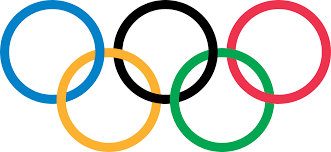

In [6]:
from IPython.display import Image
Image('/content/olympic.png',width=1000)

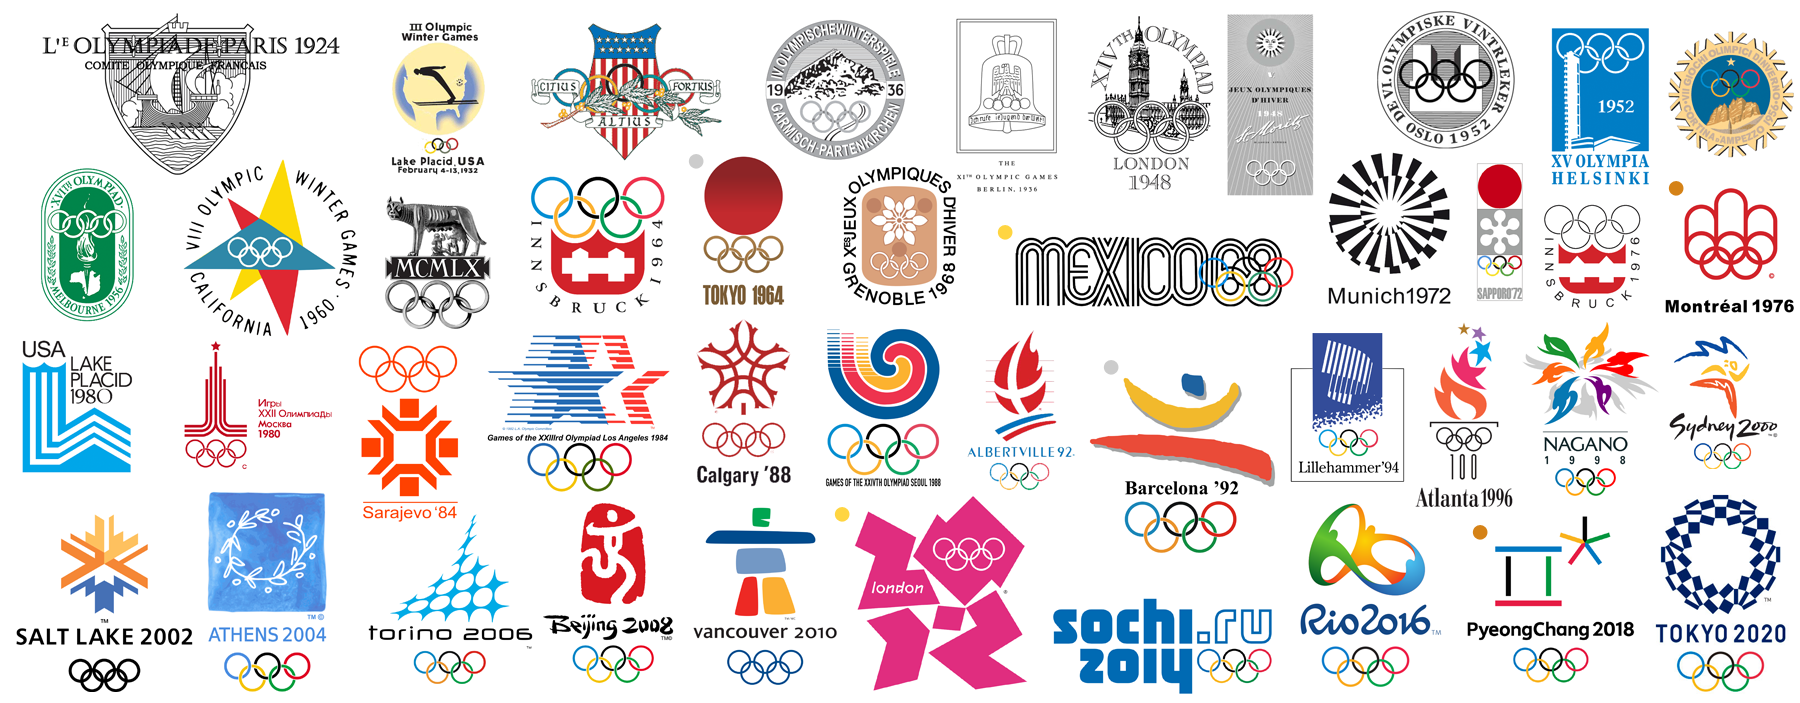

In [7]:
#History of Olympic all logo
Image('/content/History of Olympic.png',width=1000)

In [70]:
#import all the modules need for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
#plotly library
from plotly.offline import init_notebook_mode, iplot
#import warning ignores
import warnings
warnings.filterwarnings('ignore')

##Draw Olympic circle by python

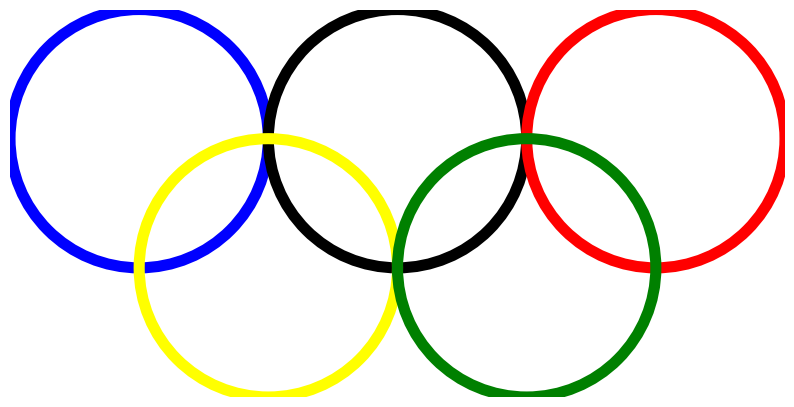

In [9]:
#draw the image of Olympic using python code
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['blue', 'black','red','yellow', 'green']
positions = [(0, 0), (2, 0), (4, 0), (1, -1), (3, -1)]
# Draw the rings
for pos, color in zip(positions, colors):
    ax.add_patch(patches.Circle(pos, 1, edgecolor=color, facecolor='none', linewidth=8))
# Set plot properties
ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(-1, 5)
ax.set_ylim(-2, 1)
plt.show()

##Load Dataset of olympic athlete and noc

In [10]:
athlete=pd.read_csv('/content/athlete_events.csv')
regions=pd.read_csv('/content/noc_regions.csv')

In [11]:
 athlete.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [12]:
regions.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

#Merge these two dataset in to single DataFrame

In [13]:
#join two dataset into single dataframe
athlete=athlete.merge(regions,on='NOC',how='left')
athlete.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

In [14]:
athlete.shape

(271116, 17)

In [15]:
#rename columns in new df
athlete.rename(columns={'region':'Region','notes':'Notes'},inplace=True)

In [16]:
#columns of dataset
print(athlete.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')


In [17]:
#data information
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [18]:
#data summary
athlete.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In [137]:
#columns
athlete.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region', 'Notes'],
      dtype='object')

##Data Cleaning:
-Treating null values.\
-Drop duolicate row.

In [19]:
# Check for missing values
athlete.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [20]:
#treating null values of athlete dataset
athlete['Age']=athlete['Age'].fillna(athlete['Age'].mean())
athlete['Height']=athlete['Height'].fillna(athlete['Height'].mean())
athlete['Weight']=athlete['Weight'].fillna(athlete['Weight'].mean())
athlete['Medal']=athlete['Medal'].fillna('No_Medal')

In [21]:
#treating missing value in Region and Notes
athlete['Region']=athlete['Region'].fillna('Unknown')
athlete['Notes']=athlete['Notes'].fillna('No Notes')

In [22]:
athlete['Medal'].unique()

array(['No_Medal', 'Gold', 'Bronze', 'Silver'], dtype=object)

In [23]:
#value_counts each unique in medal column
athlete['Medal'].value_counts()

Medal
No_Medal    231333
Gold         13372
Bronze       13295
Silver       13116
Name: count, dtype: int64

In [24]:
# Check for missing values after treating the null value
athlete.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Region    0
Notes     0
dtype: int64

In [25]:
#check the duplicate row
athlete.duplicated().sum()

1385

In [26]:
# Remove duplicate row from dataset
athlete=athlete.drop_duplicates()

##DATA VISUALIZATION

In [27]:
#top 10 countries paricipates in olympic till now
top_10_countries=athlete.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

Team
United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Countries participates from 1896-2020'}, xlabel='Team', ylabel='count'>

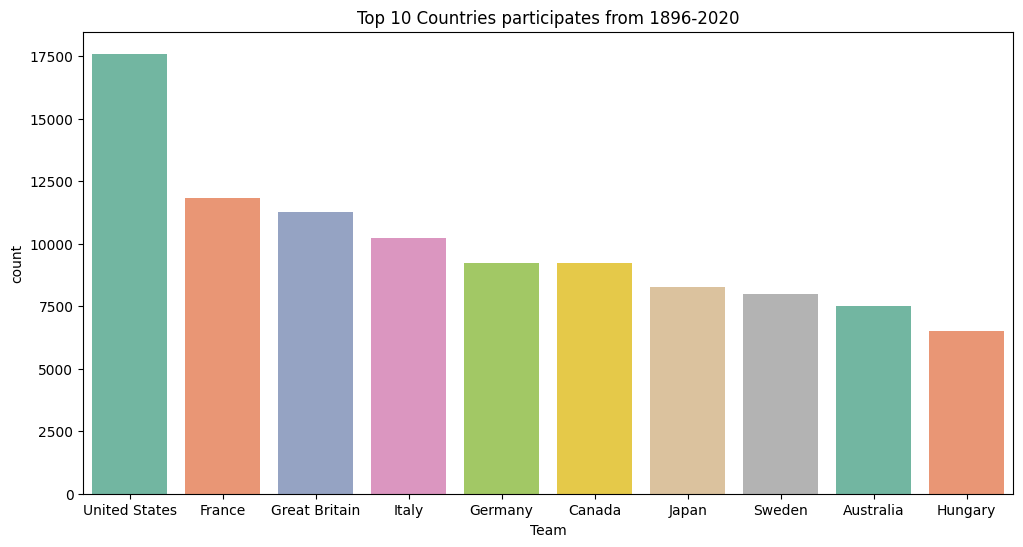

In [28]:
#bar graph to representtop 10 countries pariticipants
plt.figure(figsize=(12,6))
plt.title('Top 10 Countries participates from 1896-2020')
sns.barplot(x=top_10_countries.index,y=top_10_countries,palette='Set2')

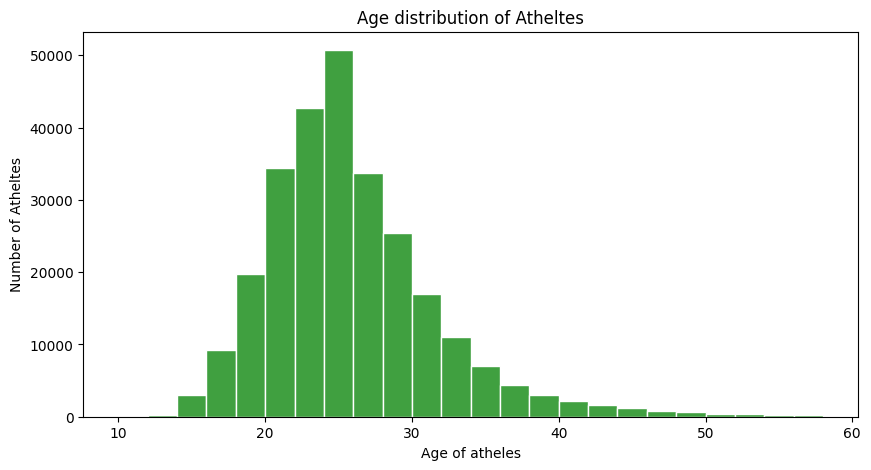

In [29]:
#Age distribution in olympic dataset
plt.figure(figsize=(10,5))
plt.title("Age distribution of Atheltes")
plt.xlabel('Age of atheles')
plt.ylabel('Number of Atheltes')
sns.histplot(athlete.Age,bins=np.arange(10,60,2),color="green",edgecolor="white")
plt.show()

In [30]:
#summer olympic sports list
summer_sports=athlete[athlete['Season']=='Summer']['Sport'].unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [31]:
#winter Olympic sports list
winter_sports=athlete[athlete['Season']=='Winter']['Sport'].unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [119]:
#Summer olympic Game hosted country list with year and city
event=athlete.groupby(by=['Year','Season','City'], as_index=False).first()
event=event[['Year','Season','City']]
event.loc[event['Season']=='Summer'].reset_index()

index  Year  Season            City
0       0  1896  Summer          Athina
1       1  1900  Summer           Paris
2       2  1904  Summer       St. Louis
3       3  1906  Summer          Athina
4       4  1908  Summer          London
5       5  1912  Summer       Stockholm
6       6  1920  Summer       Antwerpen
7       7  1924  Summer           Paris
8       9  1928  Summer       Amsterdam
9      11  1932  Summer     Los Angeles
10     13  1936  Summer          Berlin
11     15  1948  Summer          London
12     17  1952  Summer        Helsinki
13     19  1956  Summer       Melbourne
14     20  1956  Summer       Stockholm
15     22  1960  Summer            Roma
16     24  1964  Summer           Tokyo
17     26  1968  Summer     Mexico City
18     28  1972  Summer          Munich
19     30  1976  Summer        Montreal
20     32  1980  Summer          Moskva
21     34  1984  Summer     Los Angeles
22     36  1988  Summer           Seoul
23     38  1992  Summer       Barcelona
24     41  1996  Summer         Atlanta
25     43  2000  Summer          Sydney
26     45  2004  Summer          Athina
27     47  2008  Summer         Beijing
28     49  2012  Summer          London
29     51  2016  Summer  Rio de Janeiro

In [120]:
#winter olympic Game hosted country list with year and city
event=athlete.groupby(by=['Year','Season','City'], as_index=False).first()
event=event[['Year','Season','City']]
event.loc[event['Season']=='Winter'].reset_index()

index  Year  Season                    City
0       8  1924  Winter                Chamonix
1      10  1928  Winter            Sankt Moritz
2      12  1932  Winter             Lake Placid
3      14  1936  Winter  Garmisch-Partenkirchen
4      16  1948  Winter            Sankt Moritz
5      18  1952  Winter                    Oslo
6      21  1956  Winter       Cortina d'Ampezzo
7      23  1960  Winter            Squaw Valley
8      25  1964  Winter               Innsbruck
9      27  1968  Winter                Grenoble
10     29  1972  Winter                 Sapporo
11     31  1976  Winter               Innsbruck
12     33  1980  Winter             Lake Placid
13     35  1984  Winter                Sarajevo
14     37  1988  Winter                 Calgary
15     39  1992  Winter             Albertville
16     40  1994  Winter             Lillehammer
17     42  1998  Winter                  Nagano
18     44  2002  Winter          Salt Lake City
19     46  2006  Winter                  Torino
20     48  2010  Winter               Vancouver
21     50  2014  Winter                   Sochi

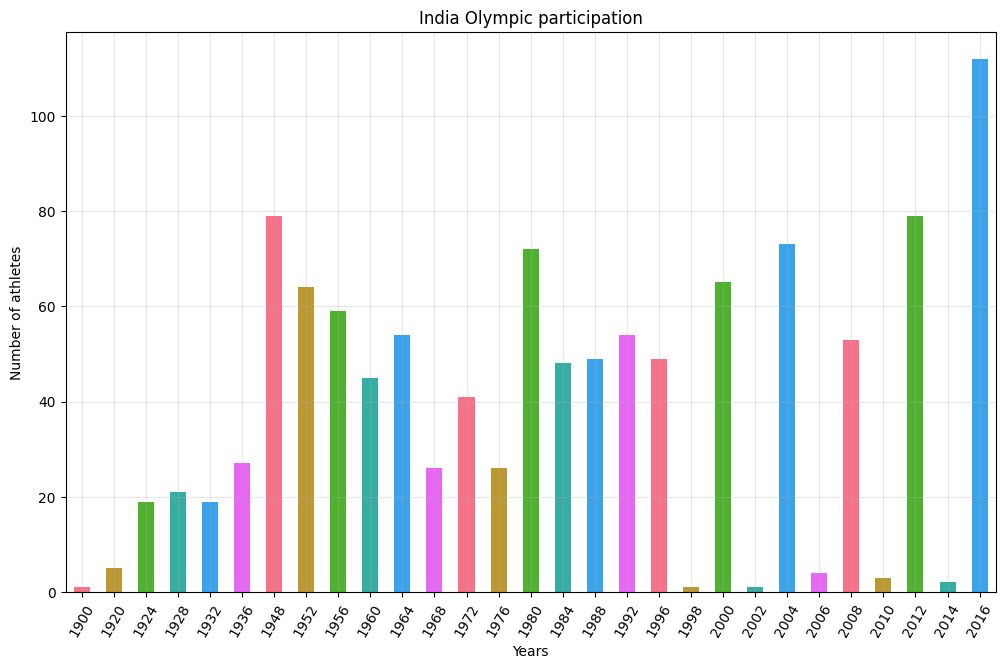

In [33]:
#india olympic participation history
data_team=athlete[athlete.Team=="India"]
data_india=data_team.loc[:,["ID","Year"]]

plt.figure(figsize=(12,16))
plt.subplot(211)

India = data_india.groupby("Year")["ID"].nunique().plot(kind = "bar",
                                                 color = sns.color_palette("husl"),
                                                 linewidth = 1)
plt.xticks(rotation = 60)
plt.title("India Olympic participation")
plt.xlabel("Years")
plt.ylabel("Number of athletes")
plt.grid(True,alpha=.3)
plt.show()

In [114]:
#2016  medal tally list of top 10 country
medal_tally=athlete.loc[athlete['Year']==2016]
top_10_country_medal_2016=medal_tally.groupby('Team')['Medal'].count().sort_values(ascending=False).head(10)
top_10_country_medal_2016

Team
United States    699
Brazil           571
Germany          528
Australia        510
France           504
China            483
Great Britain    470
Japan            436
Russia           398
Canada           397
Name: Medal, dtype: int64

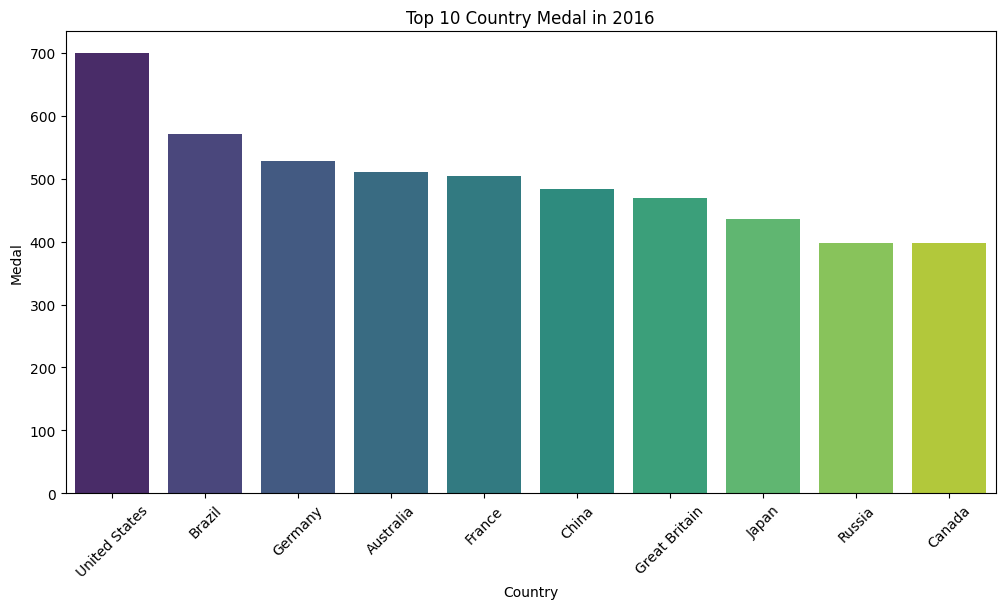

In [136]:
#plot top_10_country_medal_2016 overall olympic in bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_country_medal_2016.index,y=top_10_country_medal_2016,palette='viridis')
plt.title('Top 10 Country Medal in 2016')
plt.xlabel('Country')
plt.ylabel('Medal')
plt.xticks(rotation=45)
plt.show()

In [125]:
#top_10 country list performance in winter olympic till date
medal_tally=athlete.loc[athlete['Season']=='Winter']
top_10_country_medal_winter=medal_tally.groupby('Team')['Medal'].count().sort_values(ascending=False).head(10)
top_10_country_medal_winter

Team
United States    3321
Canada           2590
Norway           2328
Sweden           2231
Italy            2209
Japan            2056
France           1967
Austria          1954
Germany          1948
Switzerland      1911
Name: Medal, dtype: int64

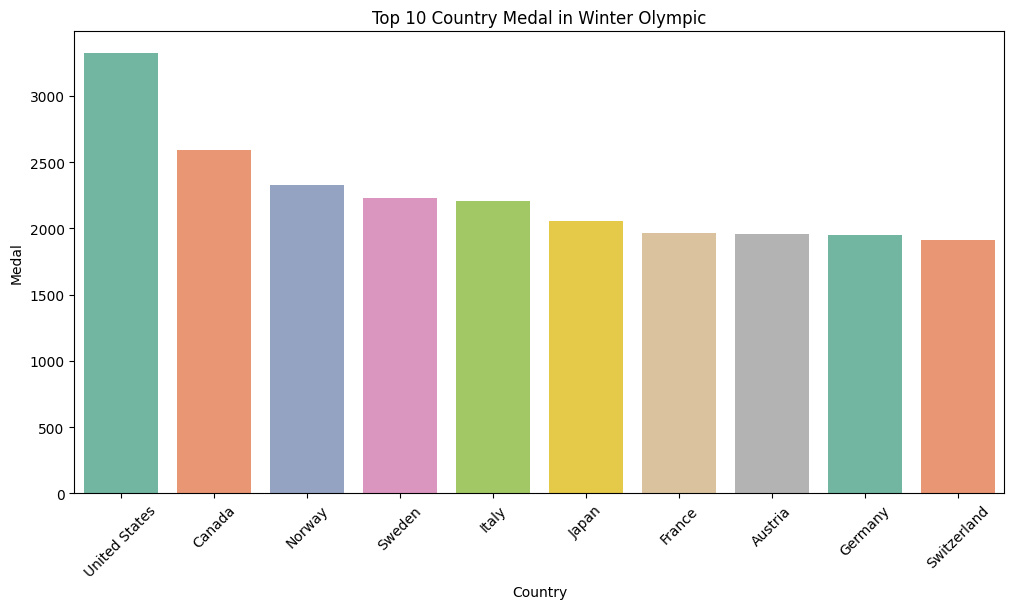

In [132]:
#top_10 country list performance in winter olympic plot chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_country_medal_winter.index,y=top_10_country_medal_winter,palette='Set2')
plt.title('Top 10 Country Medal in Winter Olympic')
plt.xlabel('Country')
plt.ylabel('Medal')
plt.xticks(rotation=45)
plt.show()

In [127]:
#top_10 country list performance in summer olympic till date
medal_tally=athlete.loc[athlete['Season']=='Summer']
top_10_country_medal_summer=medal_tally.groupby('Team')['Medal'].count().sort_values(ascending=False).head(10)
top_10_country_medal_summer

Team
United States    14277
Great Britain    10169
France            9850
Italy             8004
Germany           7282
Australia         6975
Canada            6636
Japan             6213
Hungary           6034
Sweden            5773
Name: Medal, dtype: int64

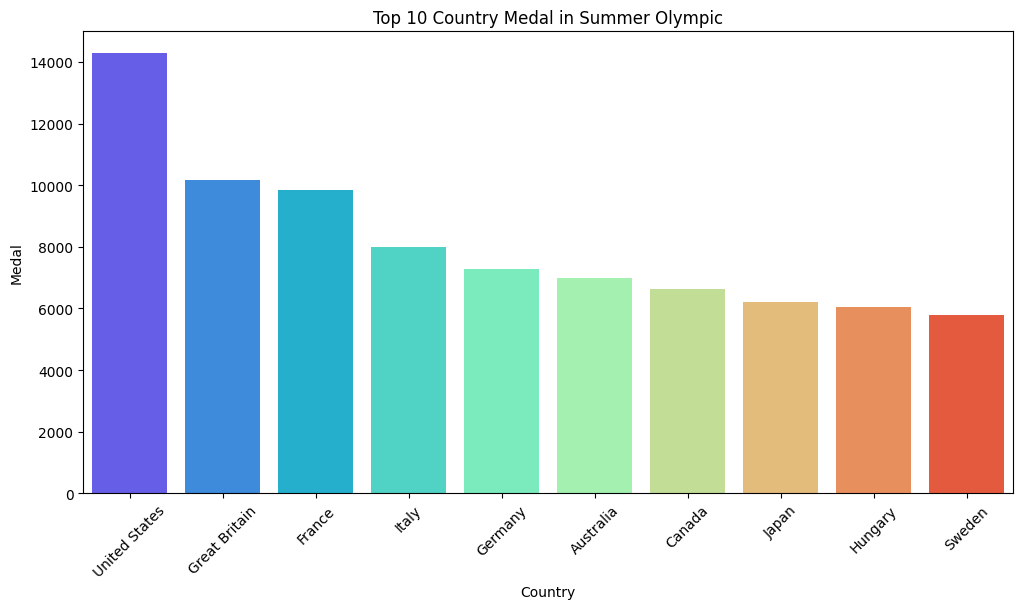

In [134]:
#barcharts of top 10 country highest medal in summer olympic till now
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_country_medal_summer.index,y=top_10_country_medal_summer,palette='rainbow')
plt.title('Top 10 Country Medal in Summer Olympic')
plt.xlabel('Country')
plt.ylabel('Medal')
plt.xticks(rotation=45)
plt.show()

In [138]:
#winter olympic top 10 highest medal winner name
athlete[(athlete.Season=='Winter')&(athlete.Medal=='Gold')]['Name'].value_counts().head(10)

Name
Ole Einar Bjrndalen                        8
Lidiya Pavlovna Skoblikova (-Polozkova)    6
Marit Bjrgen                               6
Viktor An                                  6
Lyubov Ivanovna Yegorova                   6
Arnold Clas Robert Thunberg                5
Larisa Yevgenyevna Lazutina (Ptitsyna-)    5
Eric Arthur Heiden                         5
Thomas Alsgaard (Alsgrd-)                  5
Claudia Pechstein                          5
Name: count, dtype: int64

In [139]:
#summer olympic top 10 highest medal winner name
athlete[(athlete.Season=='Summer')&(athlete.Medal=='Gold')]['Name'].value_counts().head(10)

Name
Michael Fred Phelps, II                            23
Raymond Clarence "Ray" Ewry                        10
Frederick Carlton "Carl" Lewis                      9
Larysa Semenivna Latynina (Diriy-)                  9
Paavo Johannes Nurmi                                9
Mark Andrew Spitz                                   9
Matthew Nicholas "Matt" Biondi                      8
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8
Sawao Kato                                          8
Birgit Fischer-Schmidt                              8
Name: count, dtype: int64

In [118]:
#grouping by sex value count in pariticipants
data_gender=athlete['Sex'].value_counts()
data_gender.head()

Sex
M    195353
F     74378
Name: count, dtype: int64

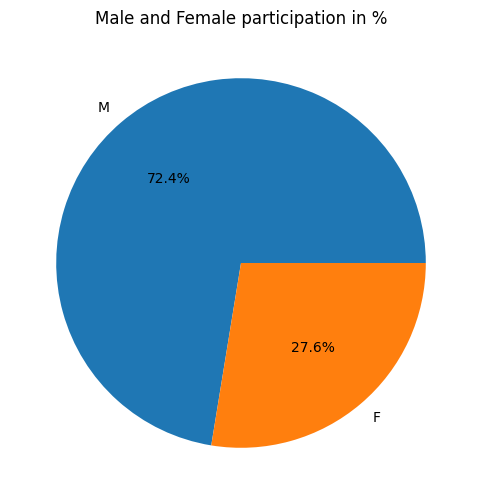

In [34]:
#male and female participant comparison pie chart
gender_counts=athlete['Sex'].value_counts()
plt.figure(figsize=(10,6))
plt.title('Male and Female participation in %')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%')
plt.show()

In [91]:
#sex ratio of participant on olympic  Donut chart
fig = {
  "data": [
    {
      "values": athlete['Sex'].value_counts(),
      "labels": ["Male","Female"],
      "name": "Sex Ratio of Participants",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
     "layout": {
        "title":"Sex Ratio Of Participants"
     }
}
iplot(fig, filename='donut')

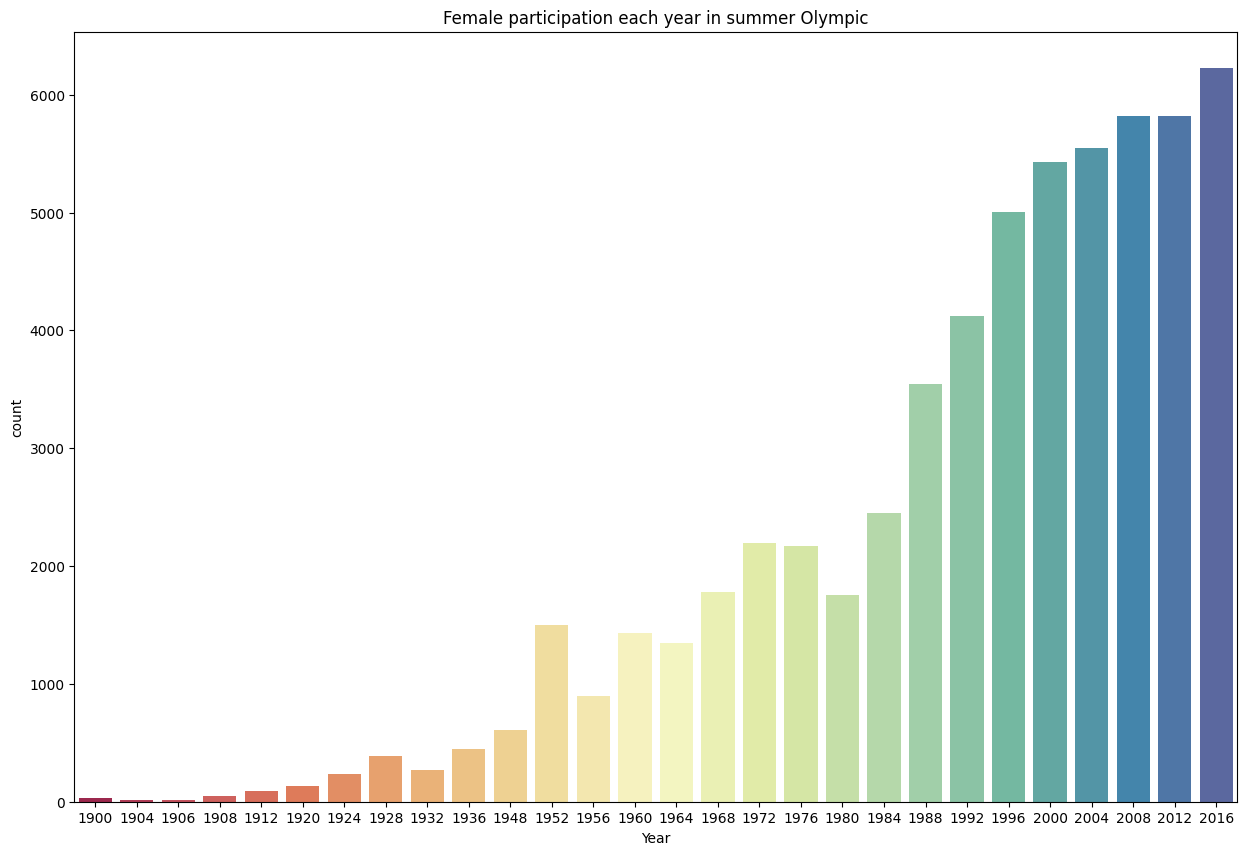

In [35]:
#Female participant each year in summer
female_participants=athlete[(athlete.Sex=='F')&(athlete.Season=='Summer')]['Year'].value_counts()
#plot bar chart on year wise female participate
plt.figure(figsize=(15,10))
plt.title('Female participation each year in summer Olympic')
sns.barplot(x=female_participants.index,y=female_participants,palette='Spectral')
plt.show()

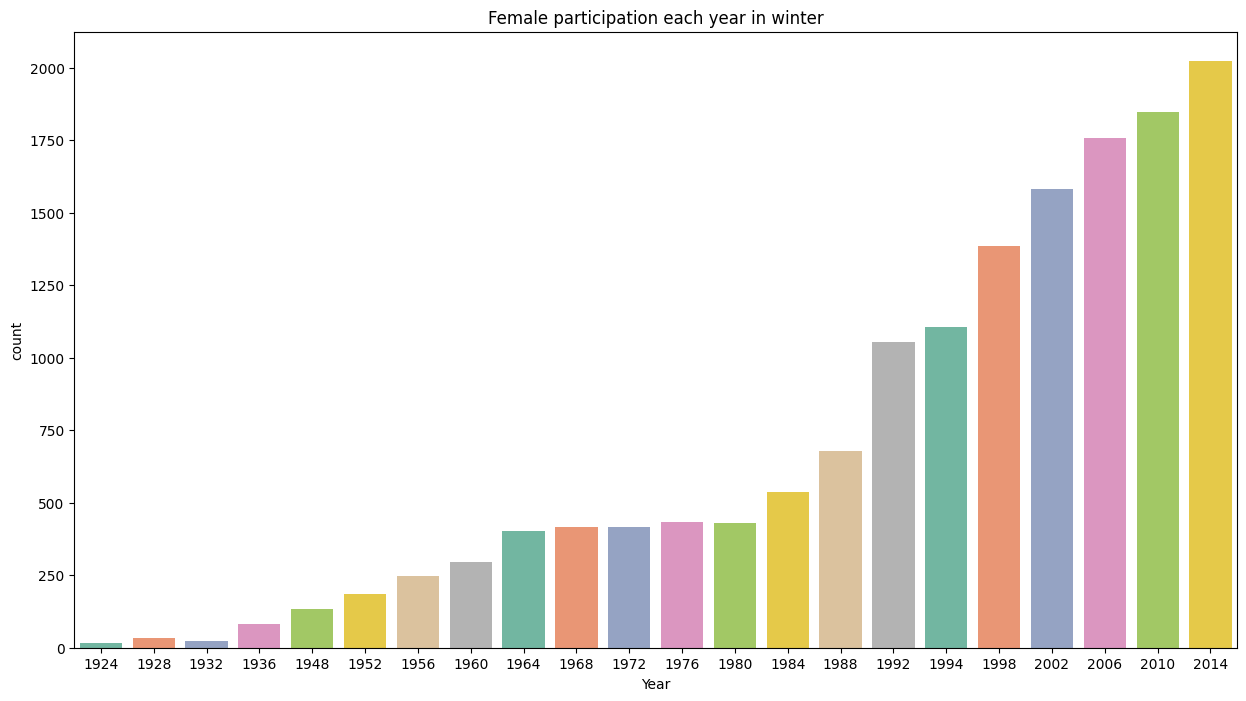

In [36]:
#female paricipate in winder olympic
female_participant_w=athlete[(athlete.Sex=='F')&(athlete.Season=='Winter')]['Year'].value_counts()
#plot bar chart on year wise female participate
plt.figure(figsize=(15,8))
plt.title('Female participation each year in winter')
sns.barplot(x=female_participant_w.index,y=female_participant_w,palette='Set2')
plt.show()

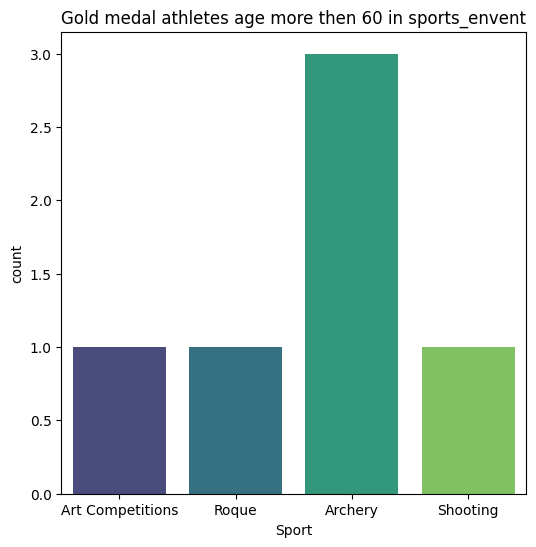

In [37]:
#athlete age more then 60 year age get Gold medal and  which sports
gold_medal_age=athlete[(athlete.Medal=='Gold')&(athlete.Age>60)]
sports_event_age=gold_medal_age['Sport'][gold_medal_age['Age']>60]
#plot bar chart on this
plt.figure(figsize=(6,6))
plt.title('Gold medal athletes age more then 60 in sports_envent')
sns.countplot(x=sports_event_age, palette='viridis')
plt.show()

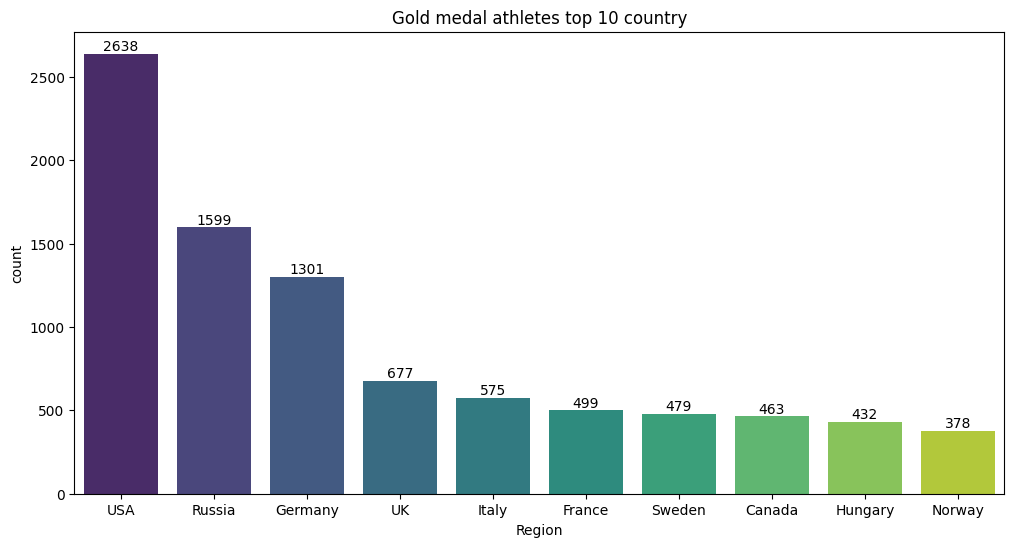

In [38]:
#Number of Gold medal on country(Region) basis
gold_medal_country=athlete[(athlete.Medal=='Gold')]['Region'].value_counts()
#top 10 country gold medal highest
gold_medal_country=gold_medal_country.head(10)
#plot bar chart on this
plt.figure(figsize=(12,6))
# Add the total medal count on top of each bar
for index, value in enumerate(gold_medal_country):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)
plt.title('Gold medal athletes top 10 country')
sns.barplot(x=gold_medal_country.index,y=gold_medal_country,palette='viridis')
plt.show()

In [39]:
#name has highest number of medal top 10 list
athlete['Name'][athlete['Medal']=='Gold'].value_counts().head(10)

Name
Michael Fred Phelps, II                            23
Raymond Clarence "Ray" Ewry                        10
Mark Andrew Spitz                                   9
Larysa Semenivna Latynina (Diriy-)                  9
Paavo Johannes Nurmi                                9
Frederick Carlton "Carl" Lewis                      9
Birgit Fischer-Schmidt                              8
Usain St. Leo Bolt                                  8
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8
Ole Einar Bjrndalen                                 8
Name: count, dtype: int64

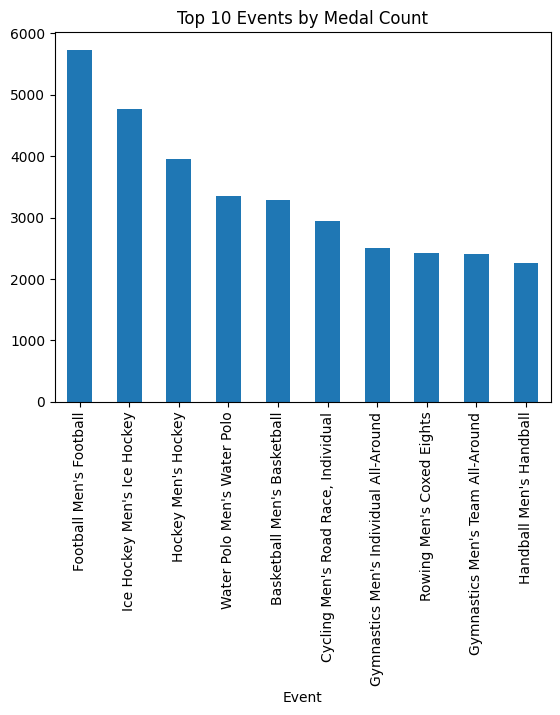

In [40]:
#Medal Distribution by Event:
medal_counts = athlete[athlete['Medal'].notnull()].groupby('Event')['Medal'].count().sort_values(ascending=False)
medal_counts.head(10).plot(kind='bar')
plt.title('Top 10 Events by Medal Count')
plt.show()

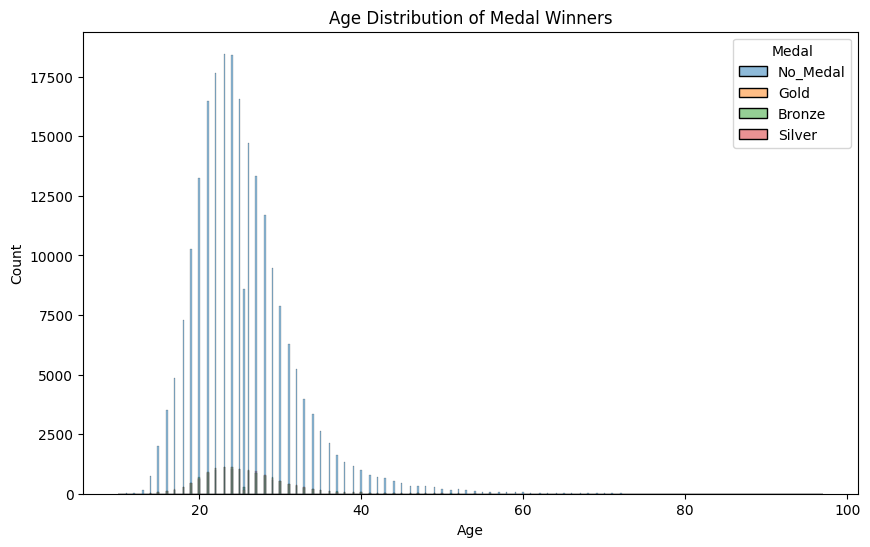

In [41]:
#Age Distribution of Medal Winners:
plt.figure(figsize=(10,6))
sns.histplot(data=athlete[athlete['Medal'].notnull()], x='Age', hue='Medal')
plt.title('Age Distribution of Medal Winners')
plt.show()

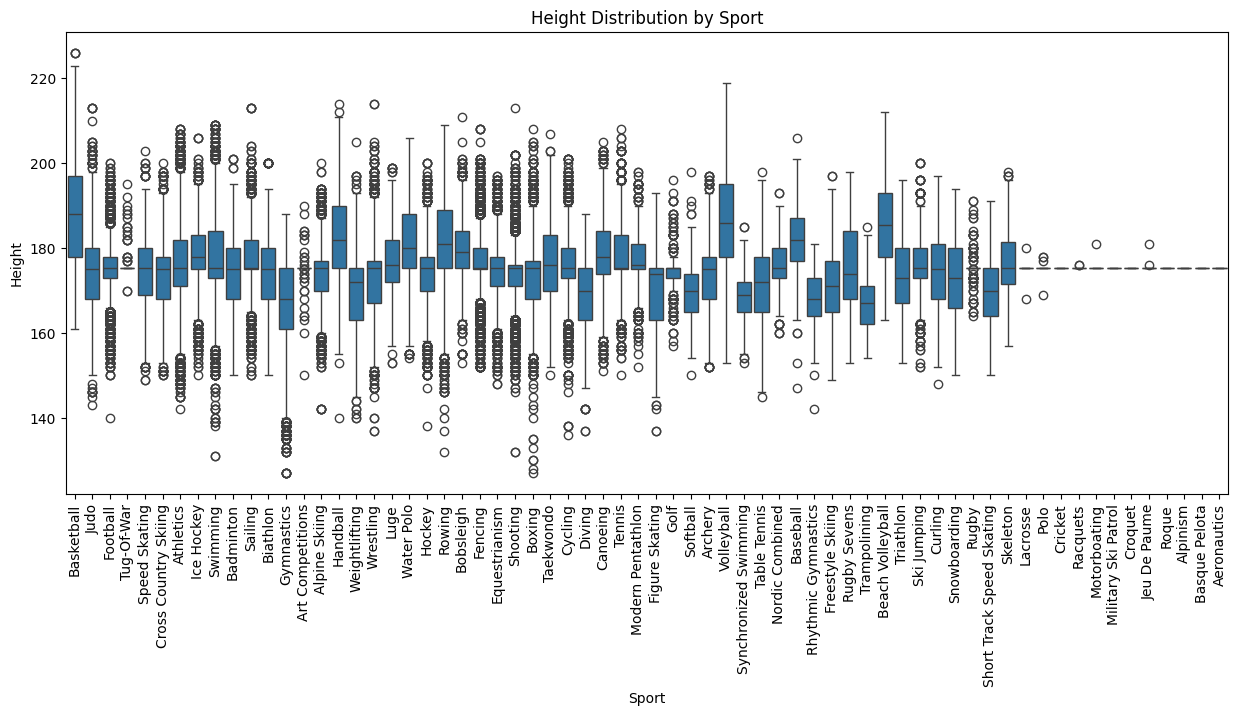

In [42]:
#Height Distribution by Sport
plt.figure(figsize=(15,6))
sns.boxplot(x='Sport', y='Height', data=athlete)
plt.title('Height Distribution by Sport')
plt.xticks(rotation=90)
plt.show()

In [44]:
#india olympic performance
india_data = athlete[athlete['Team'] == 'India']
india_medals = india_data.groupby(['Year', 'Medal'])['Medal'].count().unstack().fillna(0)
india_medals

Medal  Bronze  Gold  No_Medal  Silver
Year                                 
1900      0.0   0.0       3.0     2.0
1920      0.0   0.0       7.0     0.0
1924      0.0   7.0      20.0     0.0
1928      0.0  14.0      10.0     0.0
1932      0.0  15.0      11.0     0.0
1936      0.0  19.0      11.0     0.0
1948      0.0  20.0      69.0     0.0
1952      1.0  14.0      79.0     0.0
1956      0.0  17.0      62.0     0.0
1960      0.0   0.0      36.0    13.0
1964      0.0  15.0      97.0     0.0
1968     16.0   0.0      14.0     0.0
1972     14.0   0.0      29.0     0.0
1976      0.0   0.0      26.0     0.0
1980      0.0  16.0      62.0     0.0
1984      0.0   0.0      53.0     0.0
1988      0.0   0.0      58.0     0.0
1992      0.0   0.0      65.0     0.0
1996      1.0   0.0      53.0     0.0
1998      0.0   0.0       1.0     0.0
2000      1.0   0.0      69.0     0.0
2002      0.0   0.0       1.0     0.0
2004      0.0   0.0      80.0     1.0
2006      0.0   0.0       5.0     0.0
2008      2.0   1.0      64.0     0.0
2010      0.0   0.0       3.0     0.0
2012      4.0   0.0      85.0     2.0
2014      0.0   0.0       2.0     0.0
2016      1.0   0.0     128.0     1.0

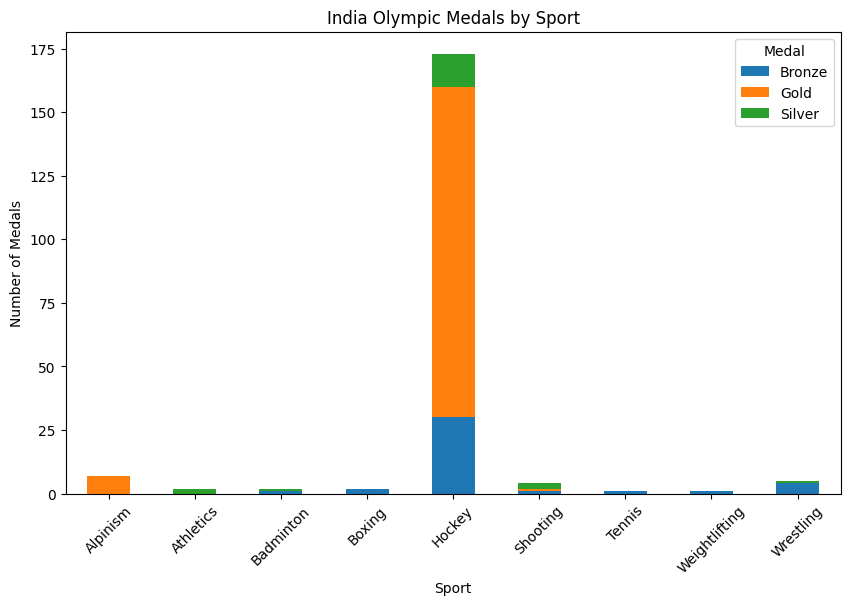

In [50]:
# Analyze the sports where India has won most medals
india_medals_by_sport = india_data[india_data['Medal'] != 'No_Medal'].groupby(['Sport', 'Medal'])['Medal'].count().unstack().fillna(0)
india_medals_by_sport.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('India Olympic Medals by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal')
plt.show()

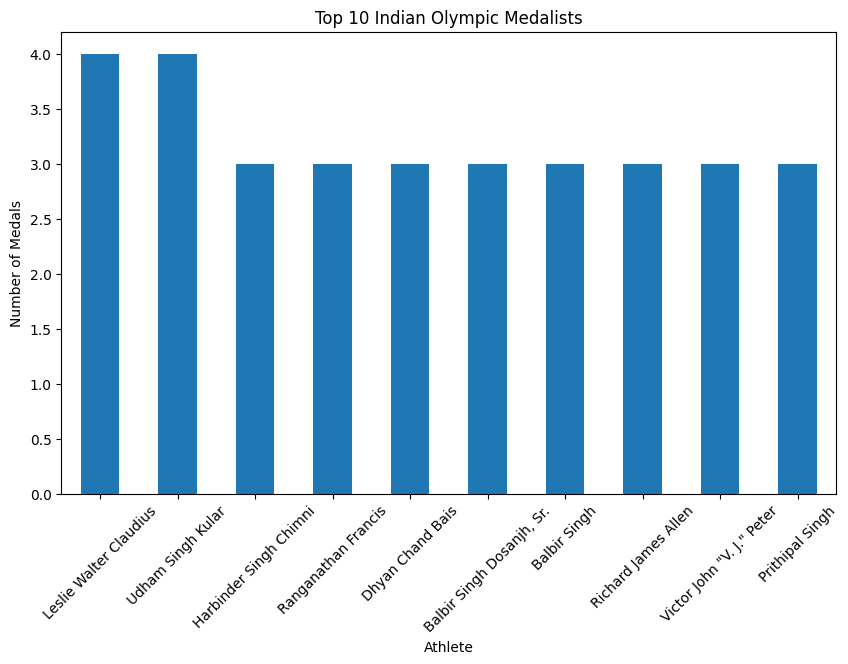

In [51]:
# Analyze the top10 Indian athletes by medal count
india_top_athletes = india_data[india_data['Medal'] != 'No_Medal'].groupby('Name')['Medal'].count().sort_values(ascending=False).head(10)
india_top_athletes.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Indian Olympic Medalists')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.show()

In [68]:
# Assuming 'athlete' is a DataFrame that contains a 'Team' column
df = pd.DataFrame(athlete['Team'].value_counts())
df['country'] = df.index
df.columns = ['number', 'country']

data = [dict(
    type='choropleth',
    locations=df['country'],
    locationmode='country names',
    z=df['number'],
    text=df['country'],
    colorscale=[
        [0, "rgb(255, 0, 0)"],  # Red
        [0.2, "rgb(255, 165, 0)"],  # Orange
        [0.4, "rgb(255, 255, 0)"],  # Yellow
        [0.6, "rgb(0, 255, 0)"],  # Green
        [0.8, "rgb(0, 0, 255)"],  # Blue
        [1, "rgb(128, 0, 128)"]  # Purple
    ],
    autocolorscale=False,
    reversescale=False,
    marker=dict(
        line=dict(
            color='rgb(180,180,180)',
            width=0.5
        )
    ),
    colorbar=dict(
        autotick=False,
        title='Olympic Participants'
    )
)]

layout = dict(
    title='Country of Participants',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection=dict(
            type='Mercator'
        )
    )
)

fig = dict(data=data, layout=layout)
pyo.iplot(fig, validate=False, filename='world-map')
plt.show()

In [74]:
#athelete cont in summer vs winter on male and female
fig = px.histogram(athlete, x="Season", color="Sex", barmode = "group",
             color_discrete_map= {'M': '#3C8DD6', 'F': '#EC2781'},
            )
fig.update_layout(
            title = "Participation of male and female athelete in both season",
            yaxis_title = "Athelete counts")

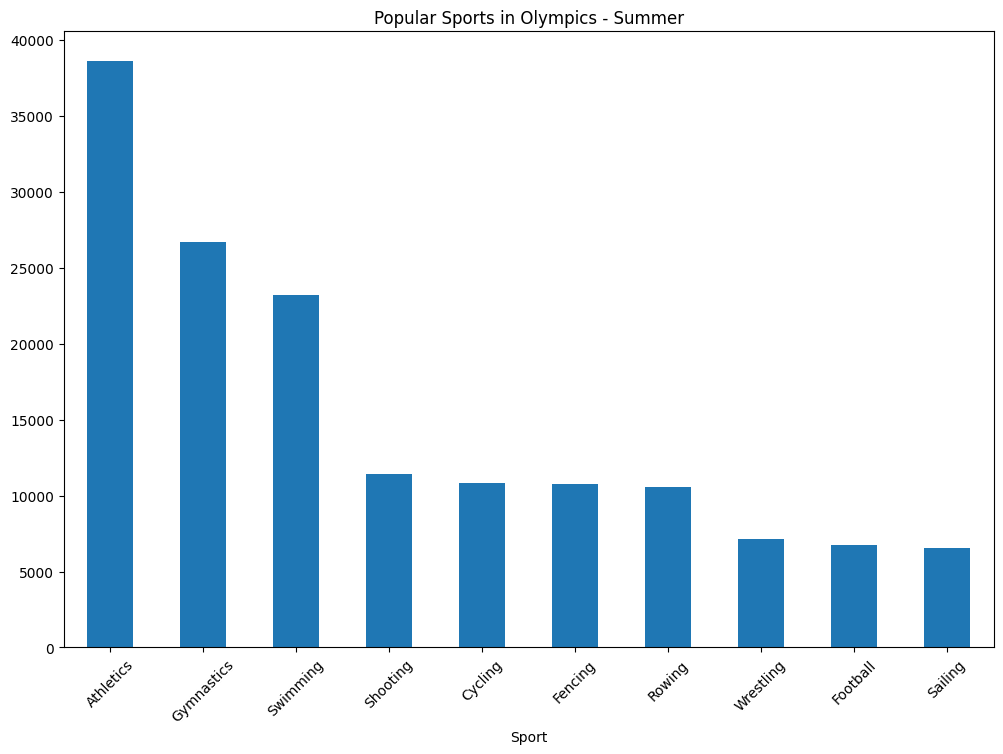

In [84]:
#most popular sports in summer olympic
plt.figure(figsize=(12,8))
tops_summer=athlete[athlete['Season']=='Summer'].Sport.value_counts().head(10)
tops_summer.plot(kind='bar')
plt.title('Popular Sports in Olympics - Summer')
plt.xticks(rotation=45)
plt.show()

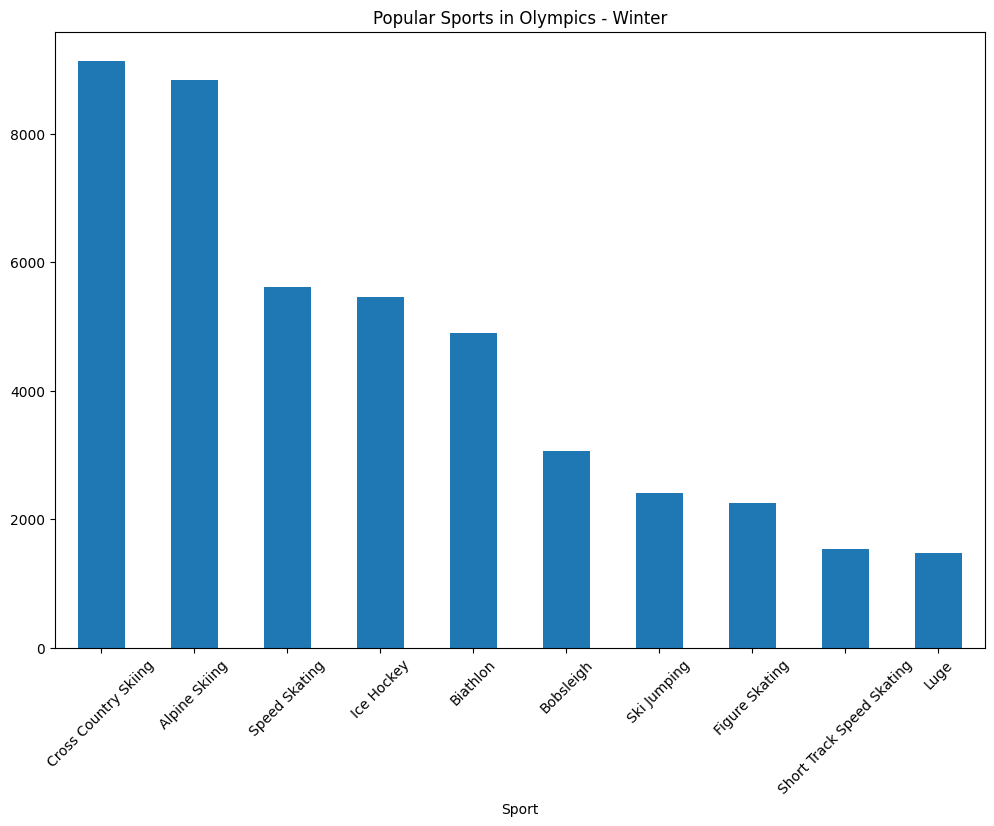

In [94]:
#most popular sports in winter olympic
plt.figure(figsize=(12,8))
tops_winter=athlete[athlete['Season']=='Winter'].Sport.value_counts().head(10)
tops_winter.plot(kind='bar')
plt.title('Popular Sports in Olympics - Winter')
plt.xticks(rotation=45)
plt.show()

In [109]:
olympics_df=athlete.rename(columns = {'Region':'Country'})
tmp= olympics_df.groupby(['Country'])['Year'].nunique()
df = pd.DataFrame(data={'Editions': tmp.values}, index=tmp.index).reset_index()

In [110]:
trace = go.Choropleth(
            locations = df['Country'],
            locationmode='country names',
            z = df['Editions'],
            text = df['Country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Editions',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Olympic countries',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)